In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

**SELECTING DATASET**

The dataset used in your script is the Heart Disease Dataset from the UCI Machine Learning Repository. It is a well-known dataset used for predicting heart disease based on various medical attributes.

In [23]:
data_url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"
try:
    data = pd.read_csv(data_url)
except Exception as e:
    print("Error loading dataset:", e)
    exit()

X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Machine Learning Models Used** *:classification*

The following models are implemented:


*   Logistic Regression
*   K-Nearest Neighbors (KNN)
*   Support Vector Machine (SVM)
*   Decision Tree Classifier

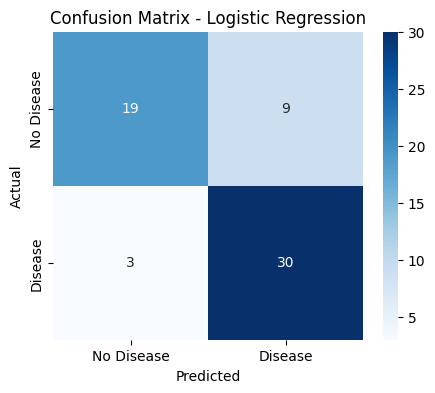


Logistic Regression Performance:
   Metric    Score
 Accuracy 0.803279
Precision 0.769231
   Recall 0.909091
 F1-score 0.833333
  AUC-ROC 0.869048


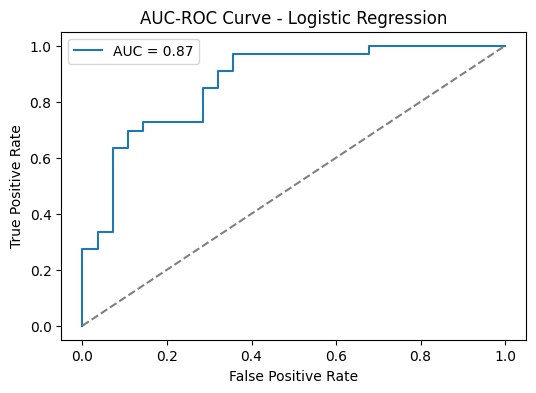

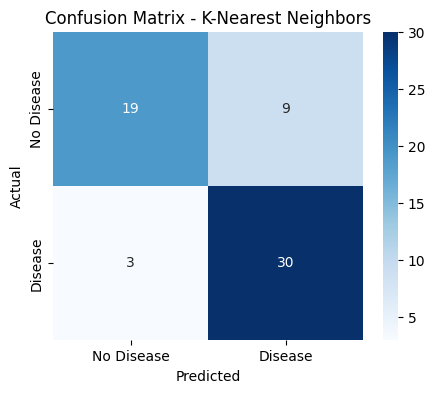


K-Nearest Neighbors Performance:
   Metric    Score
 Accuracy 0.803279
Precision 0.769231
   Recall 0.909091
 F1-score 0.833333
  AUC-ROC 0.863095


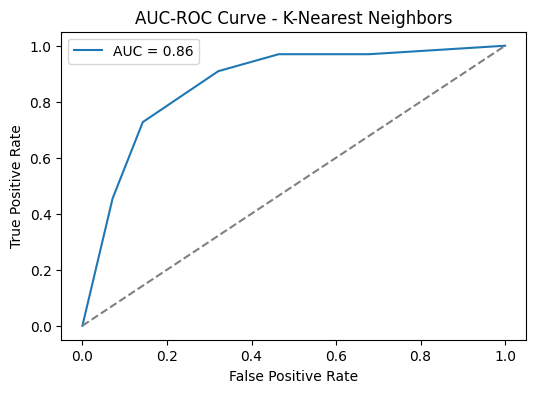

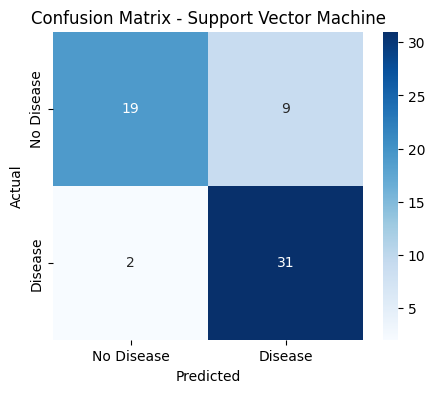


Support Vector Machine Performance:
   Metric    Score
 Accuracy 0.819672
Precision 0.775000
   Recall 0.939394
 F1-score 0.849315
  AUC-ROC 0.883117


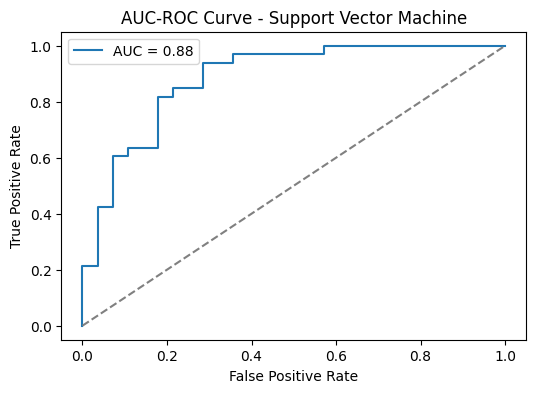

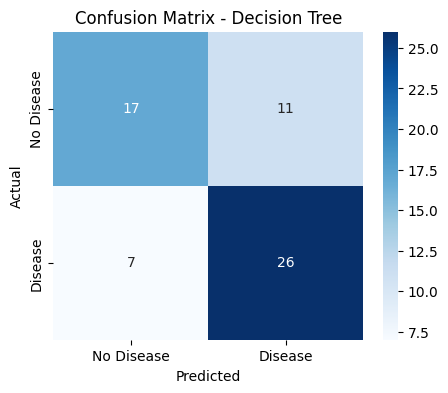


Decision Tree Performance:
   Metric    Score
 Accuracy 0.704918
Precision 0.702703
   Recall 0.787879
 F1-score 0.742857
  AUC-ROC 0.697511


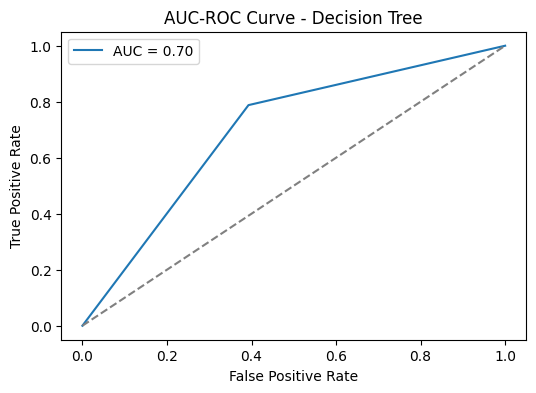

In [24]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

tauc_curves = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    fpr, tpr, _ = roc_curve(y_test, y_proba) if y_proba is not None else (None, None, None)
    auc_score = auc(fpr, tpr) if fpr is not None else None

    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, name)

    results_df = pd.DataFrame({
        "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC"],
        "Score": [
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred),
            auc_score if auc_score is not None else "N/A"
        ]
    })

    print(f"\n{name} Performance:")
    print(results_df.to_string(index=False))

    if fpr is not None:
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'AUC-ROC Curve - {name}')
        plt.legend()
        plt.show()

        auc_curves[name] = (fpr, tpr, auc_score)

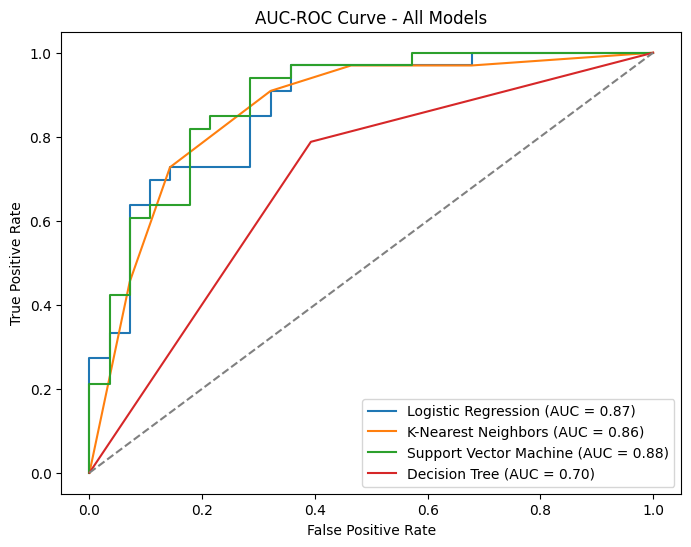

In [25]:

plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc_score) in auc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve - All Models')
plt.legend()
plt.show()